In [158]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
# Input the five cities file
Valencia_df=pd.read_csv('Resources/Valencia_Weather.csv',sep='\t')
Madrid_df=pd.read_csv('Resources/Madrid_Weather.csv',sep='\t')
Barcelona_df=pd.read_csv('Resources/Barcelona_Weather.csv',sep='\t')
Seville_df=pd.read_csv('Resources/Seville_Weather.csv',sep='\t')
Bilbao_df=pd.read_csv('Resources/Bilbao_Weather.csv',sep='\t')
Valencia_df=Valencia_df.set_index(['dt_iso'])
Madrid_df=Madrid_df.set_index(['dt_iso'])
Barcelona_df=Barcelona_df.set_index(['dt_iso'])
Seville_df=Seville_df.set_index(['dt_iso'])
Bilbao_df=Bilbao_df.set_index(['dt_iso'])
Seville_df

,Unnamed: 0,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,excessive waste
dt_iso,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,273.375,273.375,273.375,1039,75,1,21,0.0,0.0,0.0,0,0
2015-01-01 00:00:00+00:00,1,273.375,273.375,273.375,1039,75,1,21,0.0,0.0,0.0,0,0
2015-01-01 01:00:00+00:00,2,274.086,274.086,274.086,1039,71,3,27,0.0,0.0,0.0,0,0
2015-01-01 02:00:00+00:00,3,274.086,274.086,274.086,1039,71,3,27,0.0,0.0,0.0,0,0
2015-01-01 03:00:00+00:00,4,274.086,274.086,274.086,1039,71,3,27,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,35497,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,0
2018-12-31 19:00:00+00:00,35498,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,0
2018-12-31 20:00:00+00:00,35499,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,0


In [160]:
Madrid_df.index=pd.to_datetime(Madrid_df.index,utc=True)
Madrid_df=Madrid_df['2015':'2018']
Valencia_df.index=pd.to_datetime(Valencia_df.index,utc=True)
Valencia_df=Valencia_df['2015':'2018']
Barcelona_df.index=pd.to_datetime(Barcelona_df.index,utc=True)
Barcelona_df=Barcelona_df['2015':'2018']

Seville_df.index=pd.to_datetime(Seville_df.index,utc=True)
Seville_df=Seville_df['2015':'2018']

Bilbao_df.index=pd.to_datetime(Bilbao_df.index,utc=True)
Bilbao_df=Bilbao_df['2015':'2018']
len(Madrid_df)


36211

In [161]:
Madrid_df=Madrid_df.loc[~Madrid_df.index.duplicated(keep='first')]
Valencia_df=Valencia_df.loc[~Valencia_df.index.duplicated(keep='first')]
Barcelona_df=Barcelona_df.loc[~Barcelona_df.index.duplicated(keep='first')]
Seville_df=Seville_df.loc[~Seville_df.index.duplicated(keep='first')]
Bilbao_df=Bilbao_df.loc[~Bilbao_df.index.duplicated(keep='first')]

In [162]:
len(Madrid_df)


35012

In [163]:
def hour_columns(data,target_col):
    data.loc[:,'year'] = data.index.year
    data.loc[:,'month'] = data.index.month
    data.loc[:,'day'] = data.index.day
    data.loc[:,'hours'] = data.index.hour
    data.loc[:,'date'] = pd.to_datetime(data.loc[:,['year', 'month', 'day']], format='%Y-%m-%d', errors='ignore')
    
    #set the index to dates only
    data = data.set_index(pd.DatetimeIndex(data['date']))
    #drop non target columns 
    data = data.loc[:,[target_col, 'hours']]
    #pivot the table into the format Date h0, h1, ...h23
    data = data.pivot(columns='hours', values=target_col)
    return data

Madrid=hour_columns(Madrid_df,'temp')
Valencia=hour_columns(Valencia_df,'temp')
Barcelona=hour_columns(Barcelona_df,'temp')
Seville=hour_columns(Seville_df,'temp')
Bilbao=hour_columns(Bilbao_df,'temp')


In [164]:
Bilbao

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,269.7635,269.251688,269.203344,269.4855,269.327000,269.499000,270.9400,270.689000,271.707000,276.8690,...,284.591687,280.1705,281.994000,279.134000,279.2350,275.388000,274.502000,274.8390,273.545313,273.474656
2015-01-02,272.5025,272.732344,272.060656,272.0930,271.186688,270.984344,272.3870,271.649656,272.517344,277.7600,...,284.845344,280.9950,282.350000,279.801000,279.3805,276.122000,274.992000,275.0800,273.544000,273.226000
2015-01-03,273.3350,272.874656,272.841344,272.7750,272.752656,272.697313,273.4445,273.121688,273.601313,278.3975,...,284.809000,280.7105,282.514000,279.891000,279.2070,275.937656,274.607344,274.7055,272.899000,272.521000
2015-01-04,272.9860,272.327000,272.511000,273.2220,273.230344,273.765656,275.2205,275.449344,276.597656,278.0790,...,282.435000,280.6500,281.630344,280.536656,279.4265,278.338344,277.233687,276.9380,275.563656,274.998312
2015-01-05,274.6235,273.994656,NaN,273.5720,272.982344,272.846687,273.5280,273.120000,273.529000,275.3530,...,NaN,NaN,NaN,278.127313,277.5205,275.177000,274.136000,274.2520,272.825344,272.555656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,277.9400,277.500000,277.050000,277.0500,277.050000,276.500000,276.0500,276.050000,276.050000,275.5000,...,281.490000,281.0500,282.050000,281.160000,279.2700,278.010000,277.940000,276.9400,276.950000,276.950000
2018-12-28,276.8400,277.290000,277.300000,277.3000,277.850000,277.850000,278.2900,278.280000,278.830000,278.2600,...,281.930000,283.4900,283.490000,282.490000,282.4900,282.490000,281.850000,282.5000,282.500000,282.500000
2018-12-29,282.4900,282.050000,282.950000,282.9500,282.500000,282.500000,282.0500,281.490000,281.040000,281.5000,...,283.600000,283.0400,282.490000,281.490000,280.9300,280.050000,278.050000,277.0500,276.050000,274.500000


In [165]:
#Average of the temperature for each day
def total(data):
    data['Total']=data.mean(axis=1)
    return pd.DataFrame(data['Total'])

In [166]:
# input all the city dataframe into the average temperature function
new_Madrid=total(Madrid)
new_Valencia=total(Valencia)
new_Barcelona=total(Barcelona)
new_Seville=total(Seville)
new_Bilbao=total(Bilbao)
new_Bilbao

,Total
date,
2015-01-01,275.146669
2015-01-02,276.177753
2015-01-03,276.498622
2015-01-04,277.213458
2015-01-05,274.319608
...,...
2018-12-27,278.098750
2018-12-28,280.168750
2018-12-29,281.271250


In [179]:
def datetime_conversion(data):
    data.index=data.index.map(lambda x:x.strftime('%Y-%m'))
    data.index.name='hours'
    data=data.mean(level='hours')
    data_2015=pd.DataFrame(data['Total'][0:12])
    data_2016=pd.DataFrame(data['Total'][12:24])
    data_2017=pd.DataFrame(data['Total'][24:36])
    data_2018=pd.DataFrame(data['Total'][36:48])
    month=['January','February','March','April','May','June','July','August','September','October','November','December']
    plt.plot(month,data_2015['Total'],label="2015",marker='.')
    plt.plot(month,data_2016['Total'],label="2016",marker='.')
    plt.plot(month,data_2017['Total'],label="2017",marker='.')
    plt.plot(month,data_2018['Total'],label="2018",marker='.')
    plt.xticks(rotation='vertical',fontsize=12)
    plt.xlabel("Month",fontsize=18)
    plt.ylabel("Avearage Temperature(Kelvin) ",fontsize=18)
    plt.title("Average Temperature of Bilbao(2015-2018)",fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
    fig=plt.gcf()
    fig.set_size_inches(18.5,10.5)
    fig.savefig('Bilbao.png',dpi=100)
    plt.show()
    return data_2015, data_2016, data_2017,data_2018


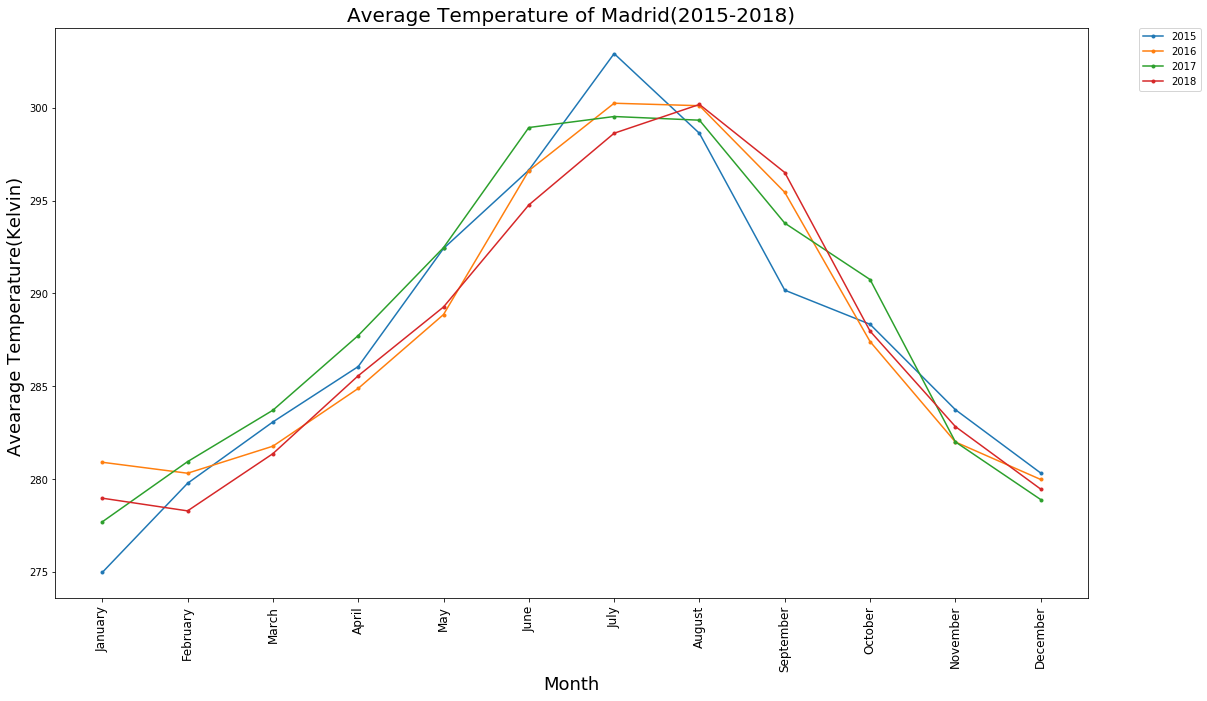

(              Total
 hours              
 2015-01  274.968748
 2015-02  279.771837
 2015-03  283.075325
 2015-04  286.057169
 2015-05  292.417852
 2015-06  296.634922
 2015-07  302.913360
 2015-08  298.618508
 2015-09  290.172500
 2015-10  288.335629
 2015-11  283.736544
 2015-12  280.325253,               Total
 hours              
 2016-01  280.904414
 2016-02  280.314265
 2016-03  281.769702
 2016-04  284.880174
 2016-05  288.858751
 2016-06  296.609876
 2016-07  300.239483
 2016-08  300.107159
 2016-09  295.443059
 2016-10  287.404524
 2016-11  281.997977
 2016-12  279.977272,               Total
 hours              
 2017-01  277.694480
 2017-02  280.937850
 2017-03  283.706661
 2017-04  287.727669
 2017-05  292.464355
 2017-06  298.930992
 2017-07  299.524517
 2017-08  299.326878
 2017-09  293.783379
 2017-10  290.745144
 2017-11  282.001655
 2017-12  278.895524,               Total
 hours              
 2018-01  278.970136
 2018-02  278.286187
 2018-03  281.366698
 2018-04  285

In [168]:
#datetime_conversion(new_Madrid)

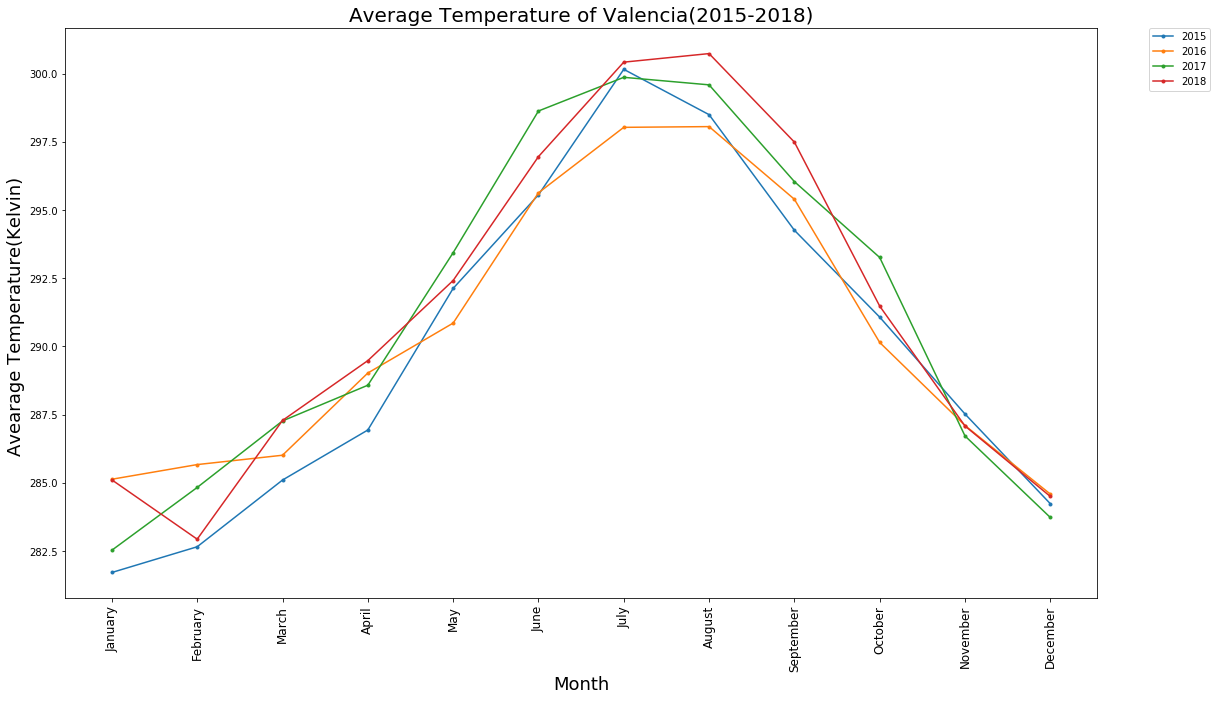

(              Total
 hours              
 2015-01  281.712825
 2015-02  282.655133
 2015-03  285.100855
 2015-04  286.935271
 2015-05  292.125869
 2015-06  295.555924
 2015-07  300.157554
 2015-08  298.495685
 2015-09  294.258512
 2015-10  291.073366
 2015-11  287.521816
 2015-12  284.233046,               Total
 hours              
 2016-01  285.130784
 2016-02  285.668123
 2016-03  286.010696
 2016-04  289.024105
 2016-05  290.854881
 2016-06  295.630024
 2016-07  298.030904
 2016-08  298.057636
 2016-09  295.394644
 2016-10  290.144992
 2016-11  287.100077
 2016-12  284.586828,               Total
 hours              
 2017-01  282.528801
 2017-02  284.829688
 2017-03  287.268582
 2017-04  288.577097
 2017-05  293.434277
 2017-06  298.629853
 2017-07  299.864456
 2017-08  299.588511
 2017-09  296.042138
 2017-10  293.260218
 2017-11  286.717636
 2017-12  283.728680,               Total
 hours              
 2018-01  285.107380
 2018-02  282.933534
 2018-03  287.285987
 2018-04  289

In [172]:
#datetime_conversion(new_Valencia)

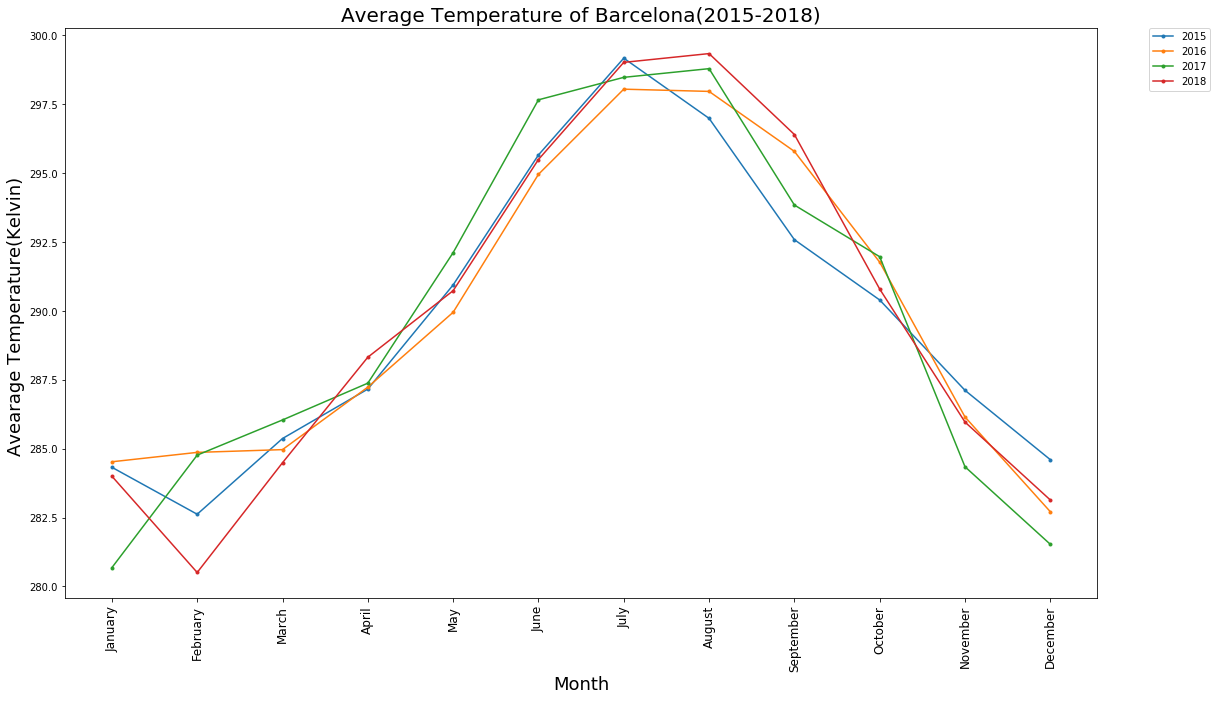

(              Total
 hours              
 2015-01  284.326282
 2015-02  282.621581
 2015-03  285.370007
 2015-04  287.164775
 2015-05  290.945229
 2015-06  295.663158
 2015-07  299.176331
 2015-08  296.992030
 2015-09  292.587887
 2015-10  290.398763
 2015-11  287.119256
 2015-12  284.601818,               Total
 hours              
 2016-01  284.525767
 2016-02  284.866616
 2016-03  284.966935
 2016-04  287.235474
 2016-05  289.951871
 2016-06  294.959405
 2016-07  298.050771
 2016-08  297.969828
 2016-09  295.792461
 2016-10  291.770554
 2016-11  286.151755
 2016-12  282.712500,               Total
 hours              
 2017-01  280.681872
 2017-02  284.766903
 2017-03  286.043676
 2017-04  287.379520
 2017-05  292.116452
 2017-06  297.664547
 2017-07  298.480065
 2017-08  298.795490
 2017-09  293.845559
 2017-10  291.968578
 2017-11  284.344491
 2017-12  281.529718,               Total
 hours              
 2018-01  284.003165
 2018-02  280.507466
 2018-03  284.491006
 2018-04  288

In [175]:
#datetime_conversion(new_Barcelona)

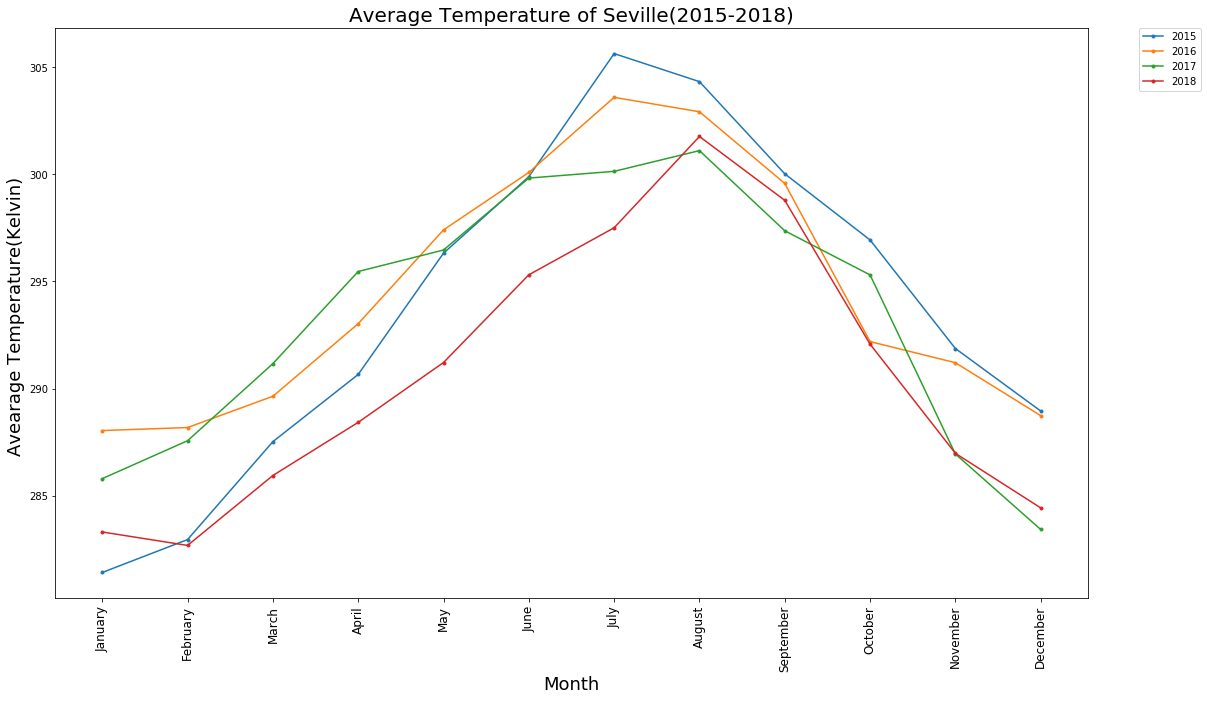

(              Total
 hours              
 2015-01  281.419458
 2015-02  282.954926
 2015-03  287.521471
 2015-04  290.657097
 2015-05  296.313462
 2015-06  299.882004
 2015-07  305.624368
 2015-08  304.315954
 2015-09  300.017903
 2015-10  296.929413
 2015-11  291.866557
 2015-12  288.951136,               Total
 hours              
 2016-01  288.039601
 2016-02  288.180378
 2016-03  289.638835
 2016-04  293.024420
 2016-05  297.399603
 2016-06  300.079986
 2016-07  303.581988
 2016-08  302.911210
 2016-09  299.566027
 2016-10  292.189110
 2016-11  291.204469
 2016-12  288.734489,               Total
 hours              
 2017-01  285.796698
 2017-02  287.565464
 2017-03  291.161438
 2017-04  295.458615
 2017-05  296.461761
 2017-06  299.817936
 2017-07  300.131124
 2017-08  301.098317
 2017-09  297.358328
 2017-10  295.300298
 2017-11  286.946601
 2017-12  283.425399,               Total
 hours              
 2018-01  283.308805
 2018-02  282.681156
 2018-03  285.943202
 2018-04  288

In [178]:
#datetime_conversion(new_Seville)

In [ ]:
datetime_conversion(new_Bilbao)